In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset

mousetrial_combined = pd.merge(clinicaltrial_df, mouse_df, on="Mouse ID", how="outer")

# Display the data table for preview
mousetrial_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = mousetrial_combined.groupby(['Drug','Timepoint'])

# Convert to DataFrame
grouped_df = pd.DataFrame(grouped_data['Tumor Volume (mm3)'].mean())

# Preview DataFrame
reset_grouped_df = grouped_df.reset_index()

reset_grouped_df.head(100)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_grouped_df = pd.DataFrame(grouped_data['Tumor Volume (mm3)'].sem())
# Convert to DataFrame
sem_grouped_final = sem_grouped_df.reset_index()
# Preview DataFrame
sem_grouped_final.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
drugs_sem_pivottable = pd.pivot_table(sem_grouped_final,
                      index="Timepoint",
                      columns="Drug",
                      values = "Tumor Volume (mm3)",
                      margins=True)

drugs_sem_df = pd.DataFrame(drugs_sem_pivottable)

updated_drugs_sem_df = drugs_sem_df.drop(columns='All')
updated_drugs_sem_df = updated_drugs_sem_df.drop('All')

updated_drugs_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
#create a pivot table then reformat this into a dataframe
drugs_pivottable = pd.pivot_table(reset_grouped_df,
                      index="Timepoint",
                      columns="Drug",
                      values = "Tumor Volume (mm3)",
                      margins=True)



drugs_table_df = pd.DataFrame(drugs_pivottable)

#drop the "All" column
updated_drugs_table_df = drugs_table_df.drop(columns="All")

#drop the "All" row

updated_drugs_table_df=updated_drugs_table_df.drop("All")
# Preview that Reformatting worked

updated_drugs_table_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:

#pulling the required mean values into a list
capomulin_mean_vals = updated_drugs_table_df['Capomulin'].tolist()
infubinol_mean_vals = updated_drugs_table_df['Infubinol'].tolist()
ketapril_mean_vals = updated_drugs_table_df['Ketapril'].tolist()
placebo_mean_vals = updated_drugs_table_df['Placebo'].tolist()

#pulling the required SEM values into a list
capomulin_sem_vals = updated_drugs_sem_df['Capomulin'].tolist()
infubinol_sem_vals = updated_drugs_sem_df['Infubinol'].tolist()
ketapril_sem_vals = updated_drugs_sem_df['Ketapril'].tolist()
placebo_sem_vals = updated_drugs_sem_df['Placebo'].tolist()

capomulin_mean_vals

[45.0,
 44.26608641544399,
 43.08429058188399,
 42.0643173468125,
 40.71632532212173,
 39.939527826868186,
 38.76933928855454,
 37.81683888251364,
 36.958000810895236,
 36.23611379944763]

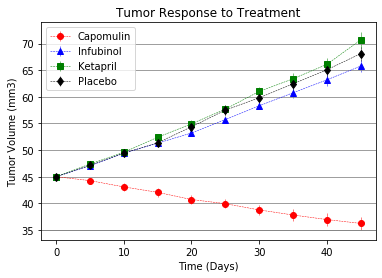

In [10]:
fig, ax = plt.subplots()

x_axis = np.arange(0,50,5)

ax.errorbar(x_axis, capomulin_mean_vals, capomulin_sem_vals, fmt="o",label="Capomulin",
            color="red", ls="--",linewidth=.5)
ax.errorbar(x_axis, infubinol_mean_vals, infubinol_sem_vals, fmt="^",label="Infubinol",
            color="blue", ls="--",linewidth=.5)

ax.errorbar(x_axis, ketapril_mean_vals, ketapril_sem_vals, fmt="s",label="Ketapril",
            color="green", ls="--",linewidth=.5)

ax.errorbar(x_axis, placebo_mean_vals, placebo_sem_vals, fmt="d",label="Placebo",
            color="black", ls="--",linewidth=.5)


ax.legend(loc="best")

ax.axhline(y=35,linewidth=.75,color="gray")
ax.axhline(y=35,linewidth=.75,color="gray")
ax.axhline(y=40,linewidth=.75,color="gray")
ax.axhline(y=45,linewidth=.75,color="gray")
ax.axhline(y=50,linewidth=.75,color="gray")
ax.axhline(y=55,linewidth=.75,color="gray")
ax.axhline(y=60,linewidth=.75,color="gray")
ax.axhline(y=65,linewidth=.75,color="gray")
ax.axhline(y=70,linewidth=.75,color="gray")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

plt.savefig("../Images/Tumor Response to Treatment.png")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metasite = pd.DataFrame(grouped_data['Metastatic Sites'].mean())

# Convert to DataFrame with reset index

mean_metasite_df = mean_metasite.reset_index()

# Preview DataFrame

mean_metasite_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_metasite = pd.DataFrame(grouped_data['Metastatic Sites'].sem())

# Convert to DataFrame

sem_metasite_df = sem_metasite.reset_index()

# Preview DataFrame

sem_metasite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_pivottable = pd.pivot_table(mean_metasite_df,
                      index="Timepoint",
                      columns="Drug",
                      values = "Metastatic Sites",
                      margins=True)



metastatic_table_df = pd.DataFrame(metastatic_pivottable)

metastatic_table_df = metastatic_table_df.drop(columns='All')
metastatic_table_df = metastatic_table_df.drop('All')

# Preview that Reformatting worked

metastatic_table_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
metastatic_sem_pivottable = pd.pivot_table(sem_metasite_df,
                      index="Timepoint",
                      columns="Drug",
                      values = "Metastatic Sites",
                      margins=True)



metastatic_sem_table_df = pd.DataFrame(metastatic_sem_pivottable)

metastatic_sem_table_df = metastatic_sem_table_df.drop(columns='All')
metastatic_sem_table_df = metastatic_sem_table_df.drop('All')

# Preview that Reformatting worked

metastatic_sem_table_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [12]:

#pulling the required mean values into a list
capomulin_mean_meta_vals = metastatic_table_df['Capomulin'].tolist()
infubinol_mean_meta_vals = metastatic_table_df['Infubinol'].tolist()
ketapril_mean_meta_vals = metastatic_table_df['Ketapril'].tolist()
placebo_mean_meta_vals = metastatic_table_df['Placebo'].tolist()

#pulling the required SEM values into a list
capomulin_sem_meta_vals = metastatic_sem_table_df['Capomulin'].tolist()
infubinol_sem_meta_vals = metastatic_sem_table_df['Infubinol'].tolist()
ketapril_sem_meta_vals = metastatic_sem_table_df['Ketapril'].tolist()
placebo_sem_meta_vals = metastatic_sem_table_df['Placebo'].tolist()

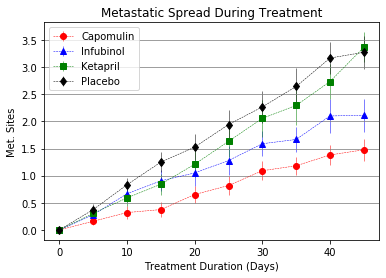

In [13]:
fig, axmeta = plt.subplots()

x_axis = np.arange(0,50,5)

axmeta.errorbar(x_axis, capomulin_mean_meta_vals, capomulin_sem_meta_vals, fmt="o",label="Capomulin",
            color="red", ls="--",linewidth=.5)
axmeta.errorbar(x_axis, infubinol_mean_meta_vals, infubinol_sem_meta_vals, fmt="^",label="Infubinol",
            color="blue", ls="--",linewidth=.5)

axmeta.errorbar(x_axis, ketapril_mean_meta_vals, ketapril_sem_meta_vals, fmt="s",label="Ketapril",
            color="green", ls="--",linewidth=.5)

axmeta.errorbar(x_axis, placebo_mean_meta_vals, placebo_sem_meta_vals, fmt="d",label="Placebo",
            color="black", ls="--",linewidth=.5)


axmeta.legend(loc="upper left")

axmeta.axhline(y=.5,linewidth=.75,color="gray")
axmeta.axhline(y=1,linewidth=.75,color="gray")
axmeta.axhline(y=1.5,linewidth=.75,color="gray")
axmeta.axhline(y=2,linewidth=.75,color="gray")
axmeta.axhline(y=2.5,linewidth=.75,color="gray")
axmeta.axhline(y=3,linewidth=.75,color="gray")
axmeta.axhline(y=3.5,linewidth=.75,color="gray")



axmeta.set_xlabel("Treatment Duration (Days)")
axmeta.set_ylabel("Met. Sites")
axmeta.set_title("Metastatic Spread During Treatment")

plt.savefig("../Images/Metastatic Spread During Treatment.png")

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

grouped_data = mousetrial_combined.groupby(['Drug','Timepoint'])


# Convert to DataFrame

mousecount_df = pd.DataFrame(grouped_data['Mouse ID'].size())


mousecount_df = mousecount_df.reset_index()

# Preview DataFrame

mousecount_df = mousecount_df.rename(columns={"Mouse ID":"Mouse Count"})
mousecount_df.head()





,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames

mousecount_pivottable = pd.pivot_table(mousecount_df,
                      index="Timepoint",
                      columns="Drug",
                      values = "Mouse Count",
                      margins=True)



mousecount_table_df = pd.DataFrame(mousecount_pivottable)

mousecount_table_df = mousecount_table_df.drop(columns='All')
mousecount_table_df = mousecount_table_df.drop('All')

# Preview that Reformatting worked

mousecount_table_df

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
#pulling survival %ages

capomulin_mousestart_val = mousecount_table_df.iloc[0,0]
infubinol_mousestart_val = mousecount_table_df.iloc[0,2]
ketapril_mousestart_val = mousecount_table_df.iloc[0,3]
placebo_mousestart_val = mousecount_table_df.iloc[0,5]

capomulin_mousecount_vals = mousecount_table_df['Capomulin'].tolist()
infubinol_mousecount_vals = mousecount_table_df['Infubinol'].tolist()
ketapril_mousecount_vals = mousecount_table_df['Ketapril'].tolist()
placebo_mousecount_vals = mousecount_table_df['Placebo'].tolist()

capomulin_survival_rate = (capomulin_mousecount_vals / capomulin_mousestart_val) * 100
infubinol_survival_rate = (infubinol_mousecount_vals / infubinol_mousestart_val) * 100
ketapril_survival_rate = (ketapril_mousecount_vals / ketapril_mousestart_val) * 100
placebo_survival_rate = (placebo_mousecount_vals / placebo_mousestart_val) * 100


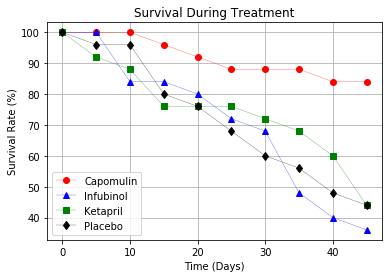

In [17]:
# Generate the Plot (Accounting for percentages)

x_axis = np.arange(0,50,5)


capomulin, = plt.plot(x_axis,capomulin_survival_rate, linewidth=.25,
                     color="red",marker="o",label="Capomulin")

infubinol, = plt.plot(x_axis,infubinol_survival_rate,linewidth=.25,
                     color="blue",marker="^",label="Infubinol")

ketapril, = plt.plot(x_axis,ketapril_survival_rate,linewidth=.25,
                    color="green",marker="s",label="Ketapril")

placebo, = plt.plot(x_axis,placebo_survival_rate,linewidth=.25,
                    color="black",marker="d",label="Placebo")


plt.grid()
plt.legend(handles=[capomulin, infubinol,ketapril,placebo],loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

plt.savefig("../Images/Survival During Treatment.png")


# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug



#updated_drugs_table_df

#percent_change = updated_drugs_table_df.pct_change(periods=len(updated_drugs_table_df)-1) * 100

# Display the data to confirm

reset_grouped_df

pct_change = reset_grouped_df.groupby('Drug', sort=False).apply(lambda x: 
                                                                ((x['Tumor Volume (mm3)'].values[-1] - 
                                                                 x['Tumor Volume (mm3)'].values[0]) /
                                                                 x['Tumor Volume (mm3)'].values[0] * 100)).reset_index(name='Percent Change')

pct_change

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [23]:
drug_graph=pct_change.iloc[[0,2,3,5],[1]]

drug_graph2=pct_change.iloc[[0,2,3,5],:]

drug_graph2

#(pct_change['Percent Change'])


#xx=pct_change.plot.bar(x='Drug',y='Percent Change')



,Drug,Percent Change
0,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
5,Placebo,51.297960


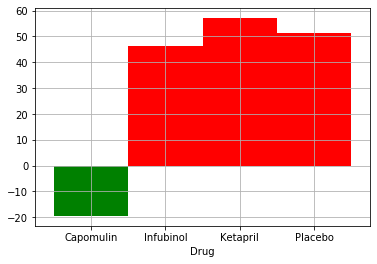

In [67]:
# Store all Relevant Percent Changes into a Tuple
x= (drug_graph['Percent Change'])

# Splice the data between passing and failing drugs

#colors = tuple(np.where(drug_graph2['Percent Change']>=0,'r','g'))


drug_graph2.plot('Drug','Percent Change',kind = 'bar', grid = True, legend = False, rot=0, width = 1, 
                 color=np.where(x>0, 'r', 'g') , figsize=(6,4))



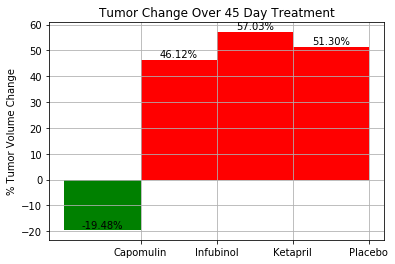

In [93]:
pct_change_tuple = (drug_graph['Percent Change'])

ind = np.arange(len(pct_change_tuple))

width = 1

fix, ax = plt.subplots()

rects1 = ax.bar(ind - width/2,pct_change_tuple, width, color=np.where(pct_change_tuple>0, 'r', 'g'))

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
plt.grid()

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center':'center','right':'left','left':'right'}
    offset={'center':0.5,'right':0.57,'left':0.43}
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()*offset[xpos],1.01*height,
               '{:.2f}%'.format(height),ha=ha[xpos],va='bottom')

autolabel(rects1,"center")

plt.savefig("../Images/Tumor Change Over 45 Day Treatment.png")

In [165]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs



# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)